In [59]:
%pip install scikit-learn
%pip install pandas
%pip install matplotlib 

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.5/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.5/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.5/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [60]:
#Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
import datetime

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy import stats

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# to make this notebook's output stable across runs
np.random.seed(42)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "decision_trees"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [61]:
#Pull 
df = pd.read_csv('https://raw.githubusercontent.com/Rodrig79/Machine-Learning-Data-Analysis-Project/master/rawData/pokemon.csv')

In [62]:
#Data Cleaning
df = df.drop(columns = ["Name","Type 1","Type 2","#","Generation","Legendary"])

# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]

In [63]:
print(df)

     Total  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0    318    45  49      49       65       65       45   
1    405    60  62      63       80       80       60   
2    525    80  82      83       100      100      80   
3    625    80  100     123      122      120      80   
4    309    39  52      43       60       50       65   
..   ...    ..  ..      ..       ..       ..       ..   
795  600    50  100     150      100      150      50   
796  700    50  160     110      160      110      110  
797  600    80  110     60       150      130      70   
798  680    80  160     60       170      130      80   
799  600    80  110     120      130      90       70   

[800 rows x 7 columns]


In [64]:
# removing extreme outliers
# statesData = statesData[statesData["cases"].between(statesData["cases"].quantile(.15), statesData["cases"].quantile(.85))]
# statesData = statesData[statesData["deaths"].between(statesData["deaths"].quantile(.15), statesData["deaths"].quantile(.85))]



In [65]:
#changes the output for the print statements
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth',0)

min

Total      180
HP         1  
Attack     5  
Defense    5  
Sp. Atk    10 
Sp. Def    20 
Speed      5  
dtype: int64

max

Total      780
HP         255
Attack     190
Defense    230
Sp. Atk    194
Sp. Def    230
Speed      180
dtype: int64

mean

Total      435.10250
HP         69.25875 
Attack     79.00125 
Defense    73.84250 
Sp. Atk    72.82000 
Sp. Def    71.90250 
Speed      68.27750 
dtype: float64

median

Total      450.0
HP         65.0 
Attack     75.0 
Defense    70.0 
Sp. Atk    65.0 
Sp. Def    70.0 
Speed      65.0 
dtype: float64

standard deviation

Total      119.963040
HP         25.534669 
Attack     32.457366 
Defense    31.183501 
Sp. Atk    32.722294 
Sp. Def    27.828916 
Speed      29.060474 
dtype: float64

first quartile

Total      330.00
HP         50.00 
Attack     55.00 
Defense    50.00 
Sp. Atk    49.75 
Sp. Def    50.00 
Speed      45.00 
Name: 0.25, dtype: float64

second quartile

Total      450.0
HP         65.0 
Attack     75.0 
Defense    7

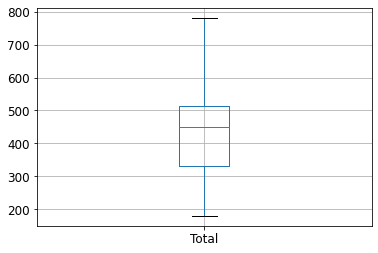

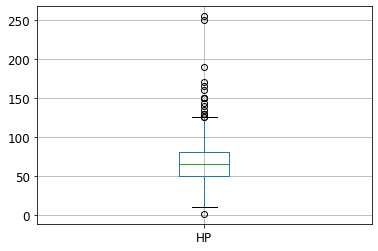

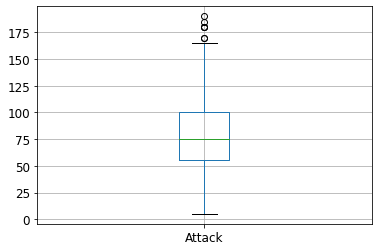

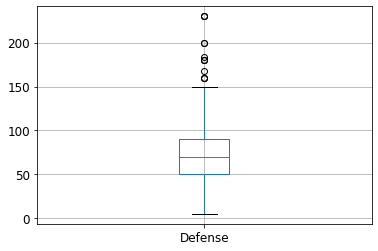

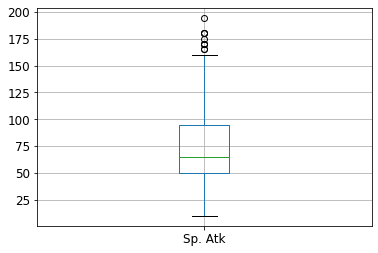

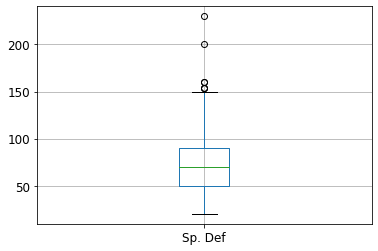

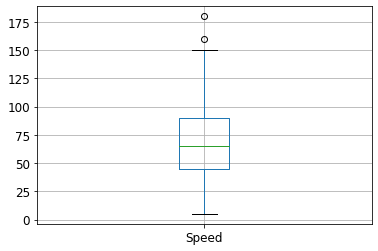

In [66]:
print("min\n")
print(df.min())
print("\nmax\n")
print(df.max())
print("\nmean\n")
print(df.mean(skipna=False))
print("\nmedian\n")
print(df.median())
print("\nstandard deviation\n")
print(df.std())

print("\nfirst quartile\n")
print(df.quantile(0.25))
print("\nsecond quartile\n")
print(df.quantile(0.50))
print("\nthird quartile\n")
print(df.quantile(0.75))
 
boxplot = df.boxplot(column='Total') 
plt.show()
boxplot = df.boxplot(column='HP') 
plt.show()
boxplot = df.boxplot(column='Attack') 
plt.show()
boxplot = df.boxplot(column='Defense') 
plt.show()
boxplot = df.boxplot(column='Sp. Atk') 
plt.show()
boxplot = df.boxplot(column='Sp. Def') 
plt.show()
boxplot = df.boxplot(column='Speed') 
plt.show()

In [67]:
statesData.dtypes

#             int64 
Name          object
Type 1        object
Type 2        object
Total         int64 
              ...   
Sp. Atk       int64 
Sp. Def       int64 
Speed         int64 
Generation    int64 
Legendary     bool  
Length: 13, dtype: object